In [14]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from collections import defaultdict
from matplotlib.colors import ListedColormap

In [15]:
# Function to display a specific slice of the images side by side
def display_nii_gz(nii_gz_image_path, nii_gz_gt_path, nii_gz_pred_path):
    data_image = nib.load(nii_gz_image_path).get_fdata()
    data_gt = nib.load(nii_gz_gt_path).get_fdata()
    data_pred = nib.load(nii_gz_pred_path).get_fdata()
    
    image = data_image[:, :, data_image.shape[2]//2]
    gt = data_gt[:, :, data_gt.shape[2]//2]
    pred = data_pred[:, :, data_pred.shape[2]//2]
    '''
    for row in image:
        if np.sum(row) > 0:
            print(row)
    '''

    colors = [
        'black',   # For (0) void
        'red',     # For (1) spleen
        'green',   # For (2) right kidney
        'blue',    # For (3) left kidney
        'yellow',  # For (4) gallbladder
        'purple',  # For (5) esophagus
        'cyan',    # For (6) liver
        'magenta', # For (7) stomach
        'orange',  # For (8) aorta
        'pink',    # For (9) inferior vena cava
        'brown',   # For (10) portal vein and splenic vein
        'grey',    # For (11) pancreas
        'lightblue',  # For (12) right adrenal gland
        'lightgreen'  # For (13) left adrenal gland
    ]
    
    # Step 2: Create a custom colormap from the color list
    cmap = ListedColormap(colors)
    plt.figure(figsize = (8,6))

    plt.subplot(1,3,1)
    plt.imshow(image, cmap=None)
    plt.title(f'Image')
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow(gt, cmap=cmap)
    plt.title(f'Ground Truth')
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.imshow(pred, cmap=cmap)
    plt.title(f'Prediction')
    plt.axis('off')
    
    plt.show()
    

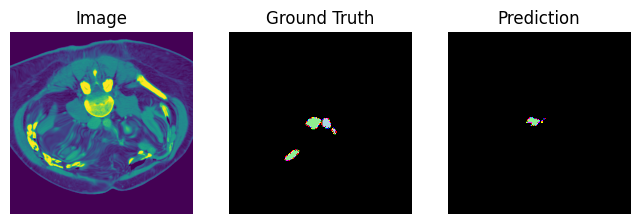

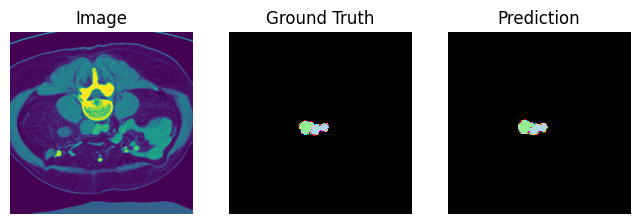

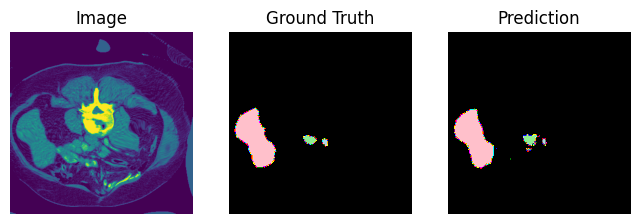

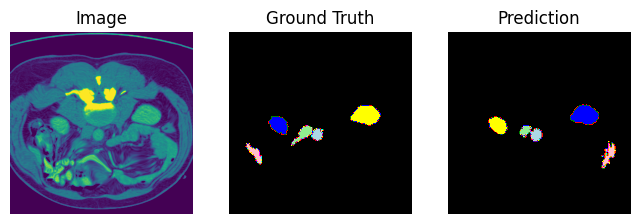

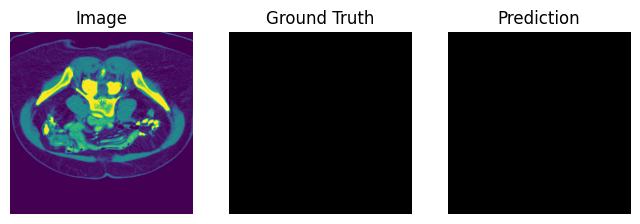

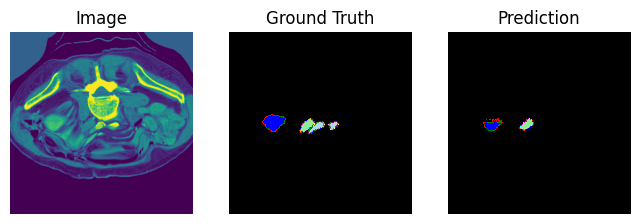

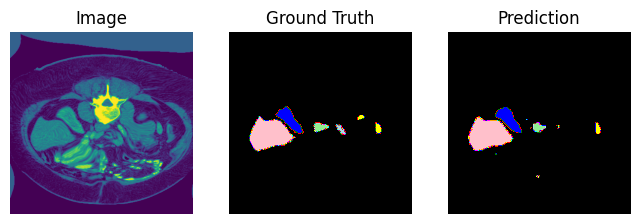

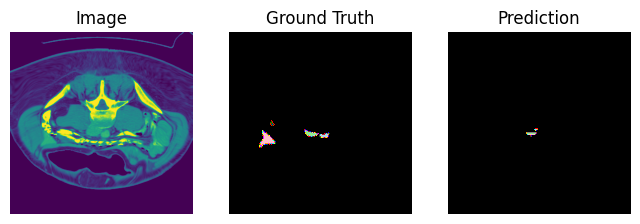

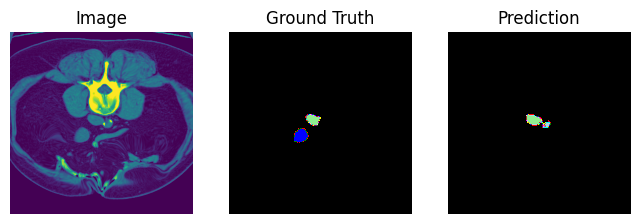

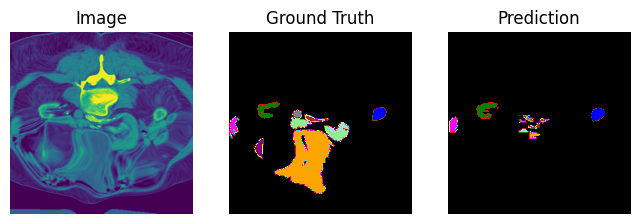

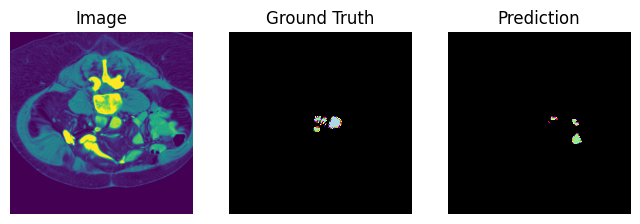

All files have been displayed.


In [16]:
# Get a list of all .nii.gz files in the current directory
nii_files = glob.glob("*.nii.gz")

# Group files based on the part of the filename before the first '_'
file_groups = defaultdict(dict)
for file_path in nii_files:
    if file_path.split('_')[-1] == "img.nii.gz":
        display_nii_gz(file_path, file_path.replace("img", "gt"), file_path.replace("img", "pred"))

print("All files have been displayed.")